In [74]:
import matplotlib.pyplot as plt
import utils
import numpy as np
import seaborn as sns
# plt.rcParams.update({'font.size': 50})
sns.set_theme(font_scale=1.5)

datasets = [
            'biodegradability',
            'mutagenesis', 
            'rossmann-store-sales' ,
            'telstra-competition-dataset', 
            'zurich',
            ]
dataset_names = ["Biodegradability", 
                 "Mutagenesis",
                 "Rossmann",
                 "Telstra",
                 "Zurich",
                 ]
methods = ['gretel', 'mostlyai', 'RCTGAN', 'SDV', 
           'REaLTabFormer', 
           'subsample']

In [75]:
all_scores = utils.read_all_metric_reports(datasets, methods)
# read all json files in directory


## Single table

In [65]:
# biodegradability
dataset = "zurich"
table = "policies"
metrics = [
            "logistic_detection", 
           "xgboost_detection", "xgboost_detection_with_children",
           "xgboost_detection_with_children_and_means"]
means = {}
ses = {}
for method in methods:
    means[method] = []
    ses[method] = []
    for metric in metrics:
        if method not in all_scores[dataset]:
            print(f"{method} not in {dataset}")
            continue
        means[method].append(all_scores[dataset][method]["metrics"]["single_table"][table][metric]["mean"][0])
        ses[method].append(all_scores[dataset][method]["metrics"]["single_table"][table][metric]["se"][0])


In [66]:
all_scores[dataset]['gretel']["metrics"]["single_table"][table].keys()

dict_keys(['logistic_detection', 'logistic_detection_with_children', 'logistic_detection_with_children_and_means', 'logistic_detection_with_means', 'statistical', 'statistical_with_children', 'xgboost_detection', 'xgboost_detection_with_children', 'xgboost_detection_with_children_and_means', 'xgboost_detection_with_means'])

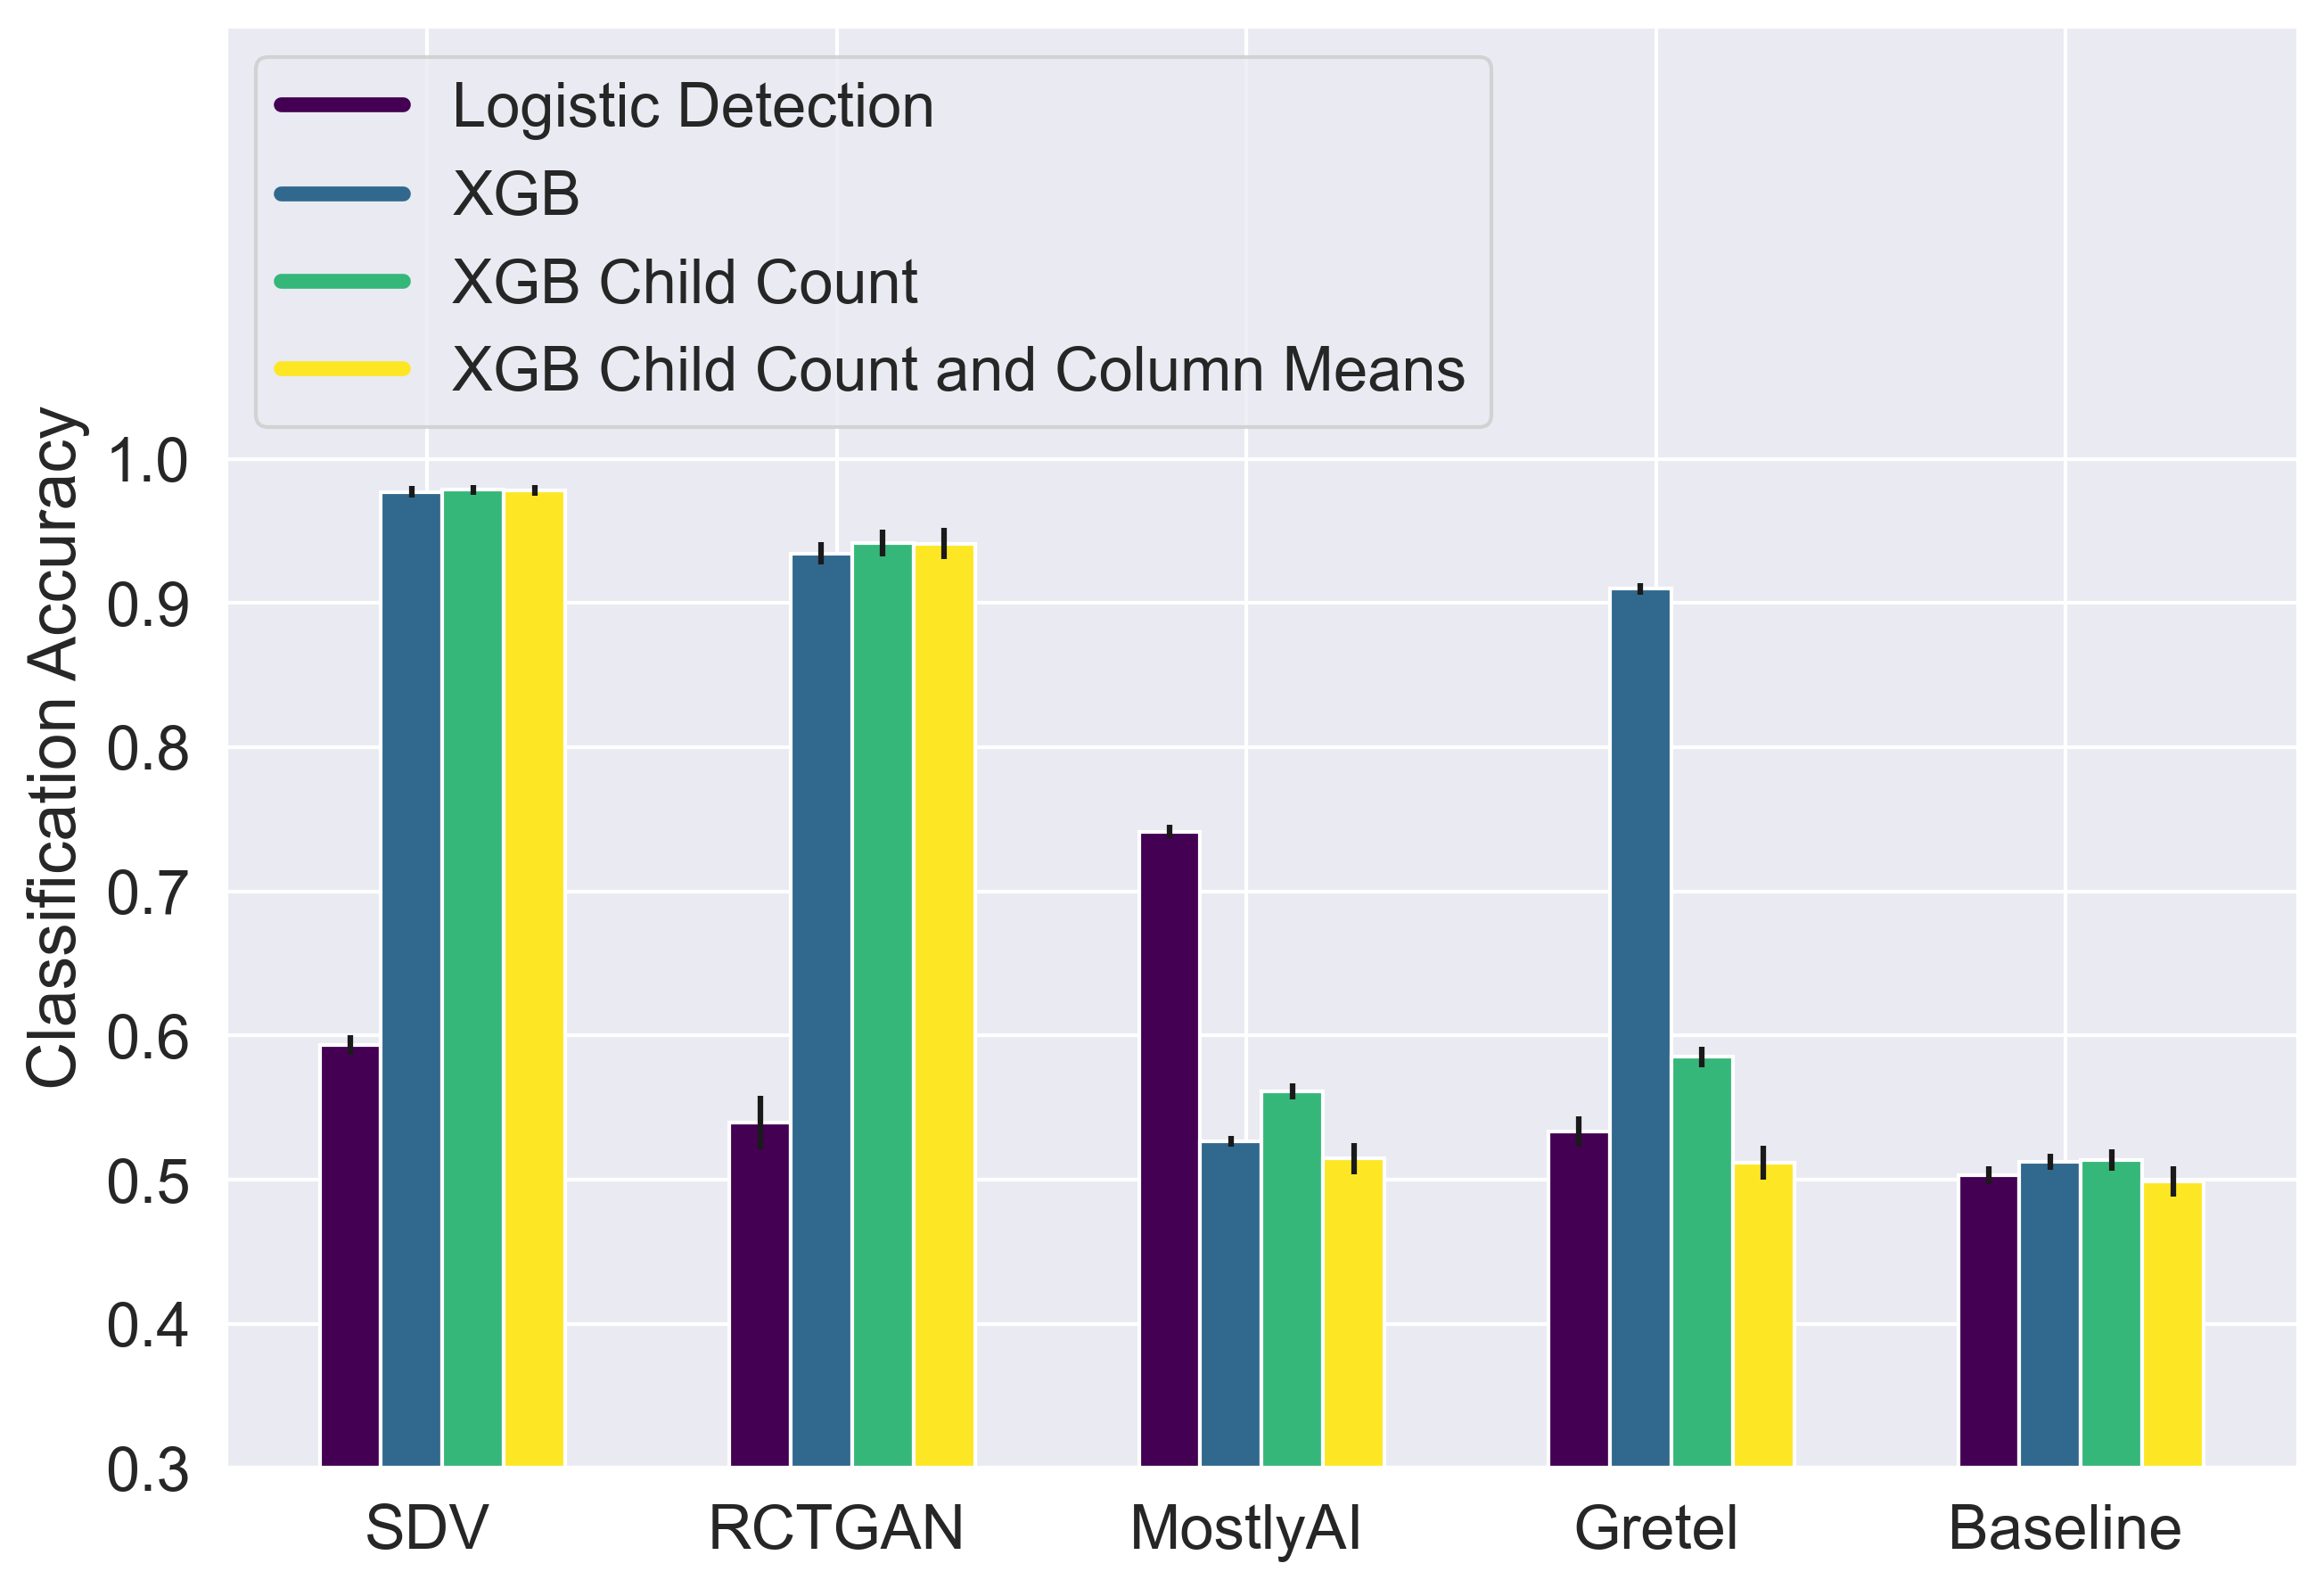

In [67]:
methods = [
           'SDV', 
           'RCTGAN', 
           'mostlyai', 
            'gretel', 
        #    'REaLTabFormer', 
           'subsample',
           ]
method_names = [
    'SDV', 
    'RCTGAN', 
    'MostlyAI', 
    'Gretel', 
    # 'REaLTabF',
    'Baseline']
metric_names = [
    'Logistic Detection',
    'XGB', 
                'XGB Child Count', 
                'XGB Child Count and Column Means',
                ]
N = len(metrics) # number of metrics
M = len(methods) # number of methods
ind = np.arange(M) # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
# set dpi
fig.dpi = 300
# make font size bigger
# plt.rcParams.update({'font.size': 20})

colors = plt.cm.viridis(np.linspace(0, 1, N)) # create a color map

for j, metric in enumerate(metrics):
    metric_means = [means[method][j] if method in means else 0 for method in methods]
    metric_ses = [ses[method][j] if method in ses else 0 for method in methods]
    ax.bar(ind + width*j, metric_means, width, yerr=metric_ses, color=colors[j])

ax.set_ylabel('Means')
# ax.set_title(f'Classification accuracy by method for denormalized dataset {dataset}')
ax.set_xticks(ind + 1.25*width)
ax.set_xticklabels(method_names)
y_min = 0.3
ax.set_ylim(y_min, 1.3)
ax.set_yticks(np.arange(y_min, 1.01, 0.1))
ax.set_ylabel("Classification Accuracy")

# Create a legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors[i], lw=4) for i in range(N)]
ax.legend(custom_lines, metric_names, loc='upper left') # move the legend

plt.savefig(f"../figs/single_table/{dataset}-{table}.png", dpi=300)
plt.show()

## MULTI TABLE

In [83]:
# biodegradability
dataset = "zurich"
metrics = [
            "parent_child_xgb_detection",
            "parent_child_xgb_detection_with_means",
            "parent_child_xgb_detection_with_children",
            "parent_child_xgb_detection_with_children_and_means",
            ]
methods = [
           'SDV', 
           'RCTGAN', 
           'mostlyai', 
            'gretel', 
        #    'REaLTabFormer', 
           'subsample',
           ]
means = {}
ses = {}
for method in methods:
    means[method] = []
    ses[method] = []
    for metric in metrics:
        if method not in all_scores[dataset]:
            print(f"{method} not in {dataset}")
            continue
        means[method].append(all_scores[dataset][method]["metrics"]["multi_table"][metric]["mean"][0])
        ses[method].append(all_scores[dataset][method]["metrics"]["multi_table"][metric]["se"][0])

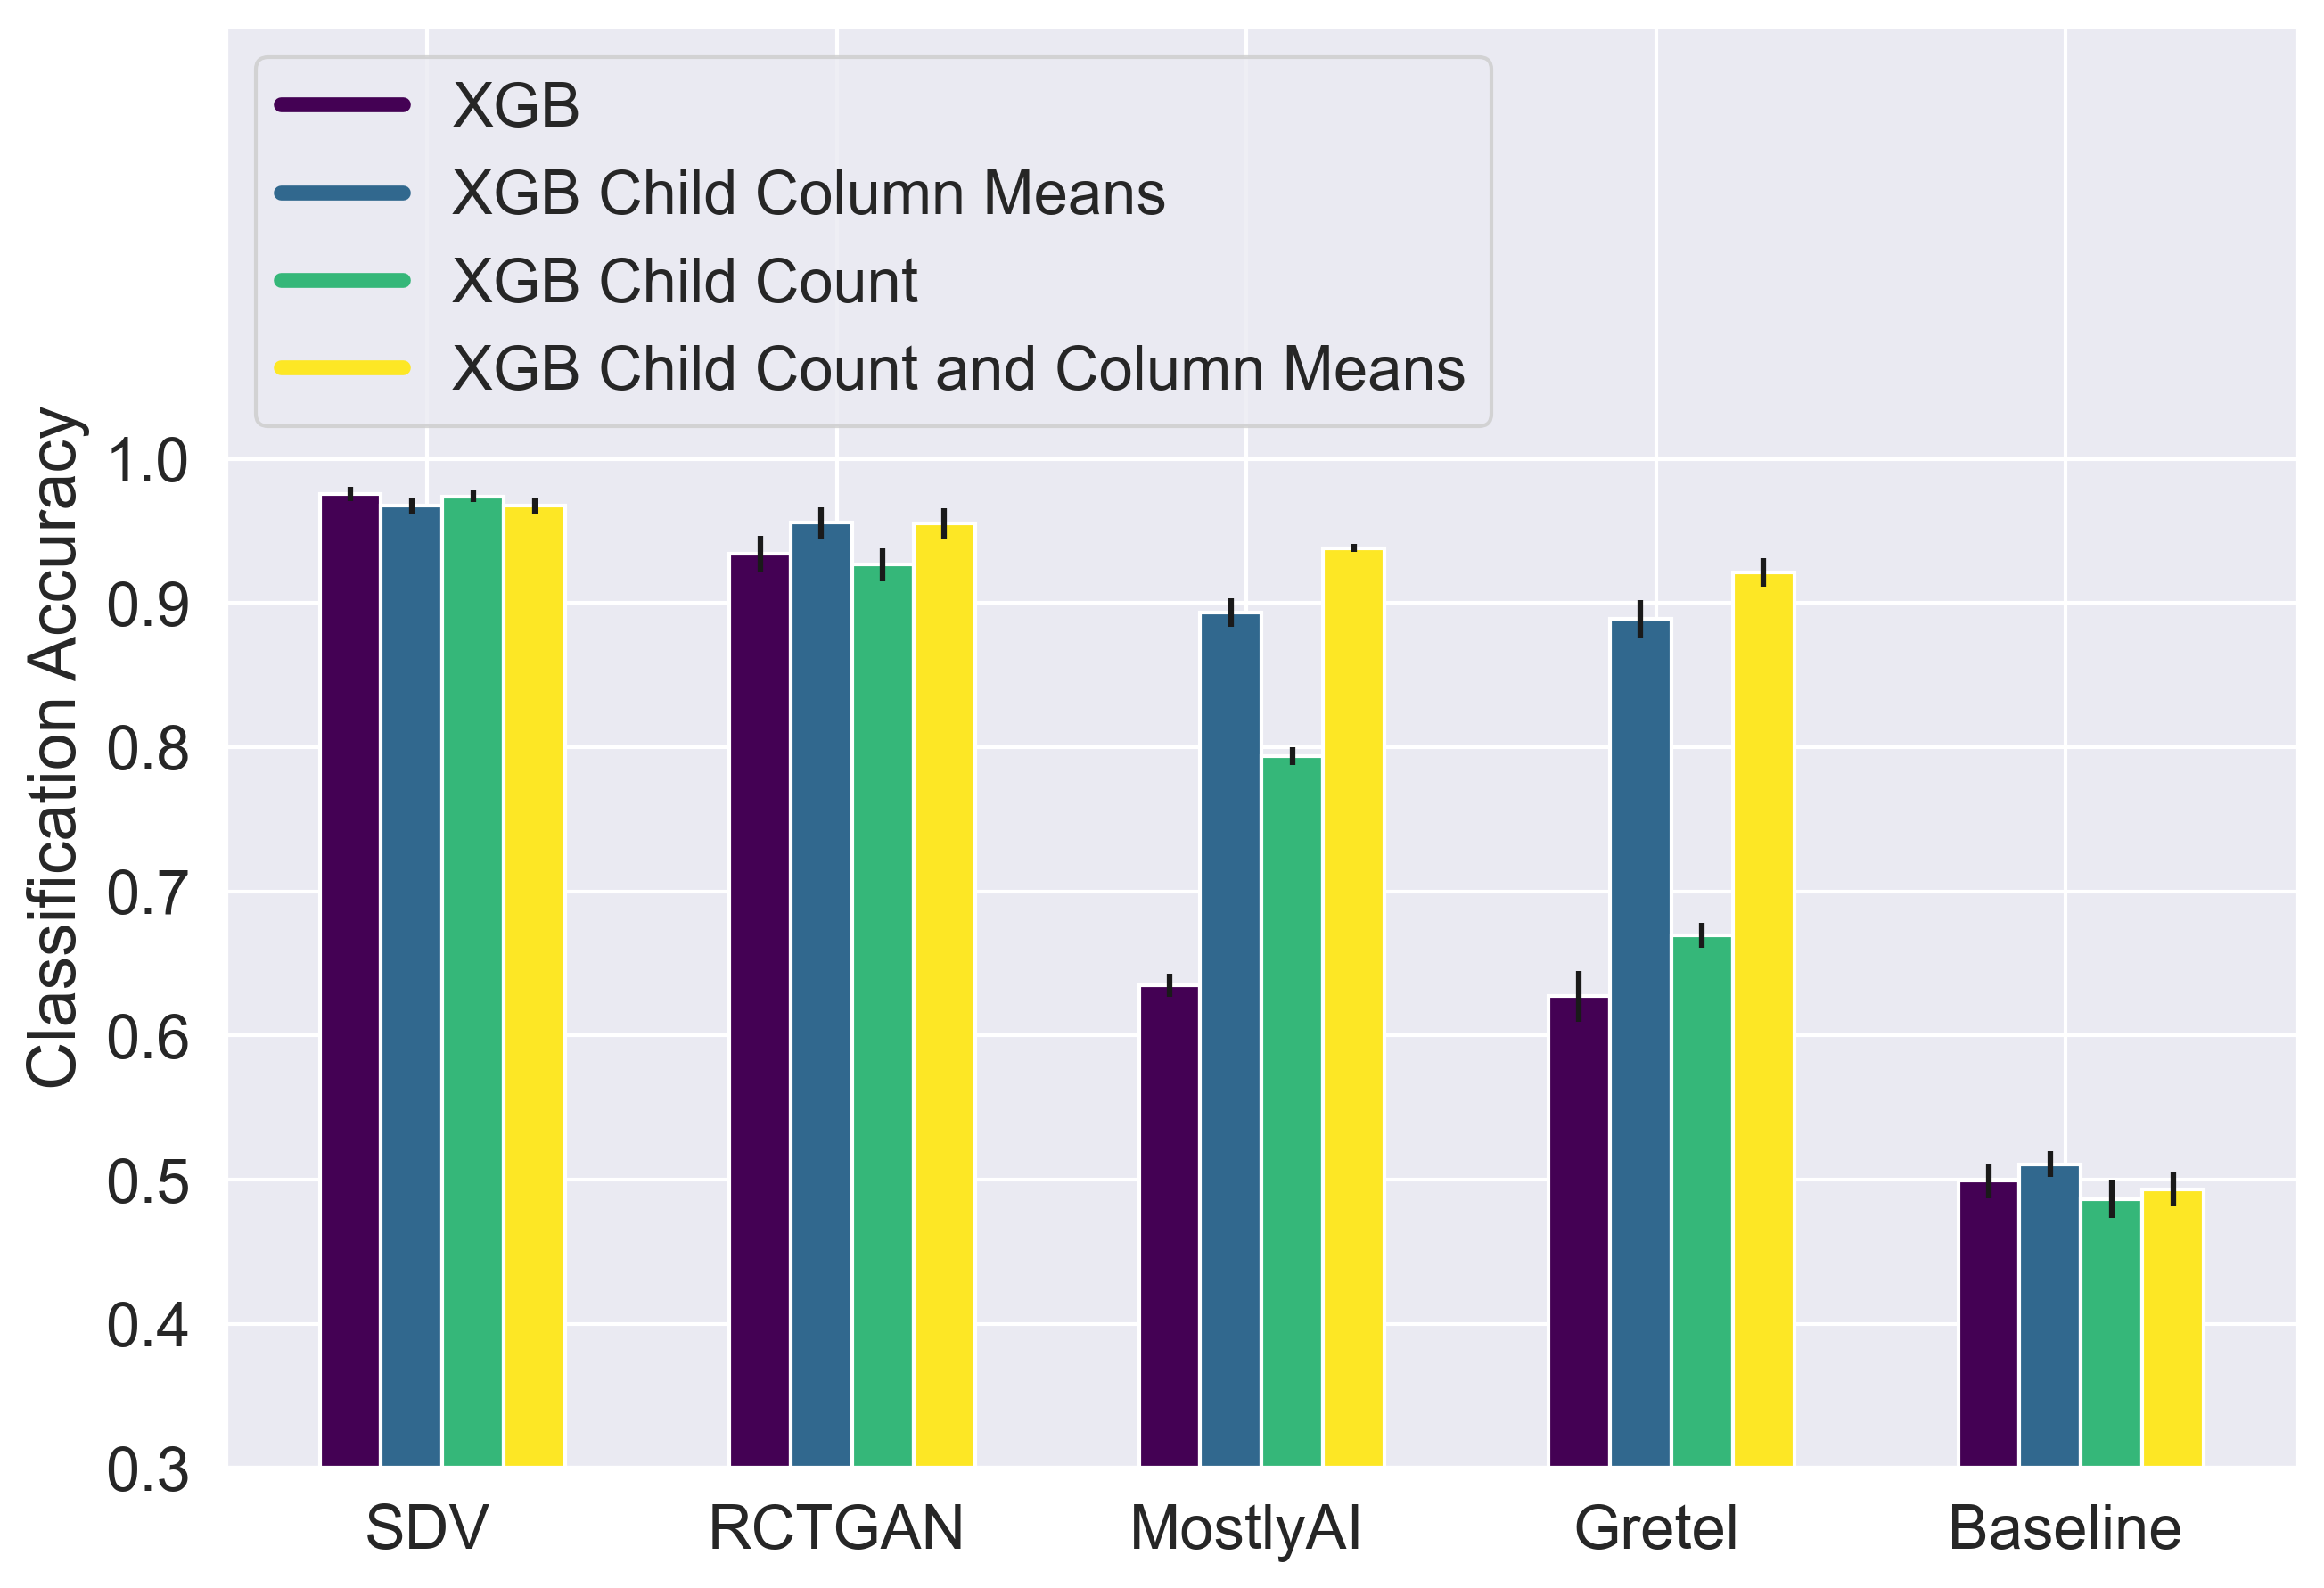

In [84]:
method_names = [
    'SDV', 
    'RCTGAN', 
    'MostlyAI', 
    'Gretel', 
    # 'REaLTabF', 
    'Baseline']
metric_names = ['XGB', 
                'XGB Child Column Means', 
                'XGB Child Count', 
                'XGB Child Count and Column Means',
                ]
N = len(metrics) # number of metrics
M = len(methods) # number of methods
ind = np.arange(M) # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
# set dpi
fig.dpi = 300
# make font size bigger
# plt.rcParams.update({'font.size': 20})

colors = plt.cm.viridis(np.linspace(0, 1, N)) # create a color map

for j, metric in enumerate(metrics):
    metric_means = [means[method][j] if method in means else 0 for method in methods]
    metric_ses = [ses[method][j] if method in ses else 0 for method in methods]
    ax.bar(ind + width*j, metric_means, width, yerr=metric_ses, color=colors[j])

ax.set_ylabel('Means')
# ax.set_title(f'Classification accuracy by method for denormalized dataset {dataset}')
ax.set_xticks(ind + 1.25*width)
ax.set_xticklabels(method_names)
y_min = 0.3
ax.set_ylim(y_min, 1.3)
ax.set_yticks(np.arange(y_min, 1.01, 0.1))
ax.set_ylabel("Classification Accuracy")

# Create a legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors[i], lw=4) for i in range(N)]
ax.legend(custom_lines, metric_names, loc='upper left') # move the legend

plt.savefig(f"../figs/multi_table/{dataset}.png")
plt.show()

## MULTI TABLE ZA CHILD COLUMNS + MEANS IN VSE DATASETE

In [50]:
# biodegradability
methods = [
           'REaLTabFormer', 
           'SDV', 
           'RCTGAN', 
            'gretel', 
           'mostlyai', 
           'subsample',
           ]
datasets = [
            'biodegradability',
            'mutagenesis', 
            'rossmann-store-sales' ,
            'telstra-competition-dataset', 
            'zurich',
            ]

metrics = [
            "parent_child_xgb_detection_with_children_and_means",
            ]
means = {}
ses = {}

for dataset in datasets:
    means[dataset] = []
    ses[dataset] = []
    for method in methods:
        if method not in all_scores[dataset]:
            print(f"{method} not in {dataset}")
            means[dataset].append(0)
            ses[dataset].append(0)
            continue
        means[dataset].append(all_scores[dataset][method]["metrics"]["multi_table"][metrics[0]]["mean"][0])
        ses[dataset].append(all_scores[dataset][method]["metrics"]["multi_table"][metrics[0]]["se"][0])

REaLTabFormer not in biodegradability
REaLTabFormer not in mutagenesis
REaLTabFormer not in zurich


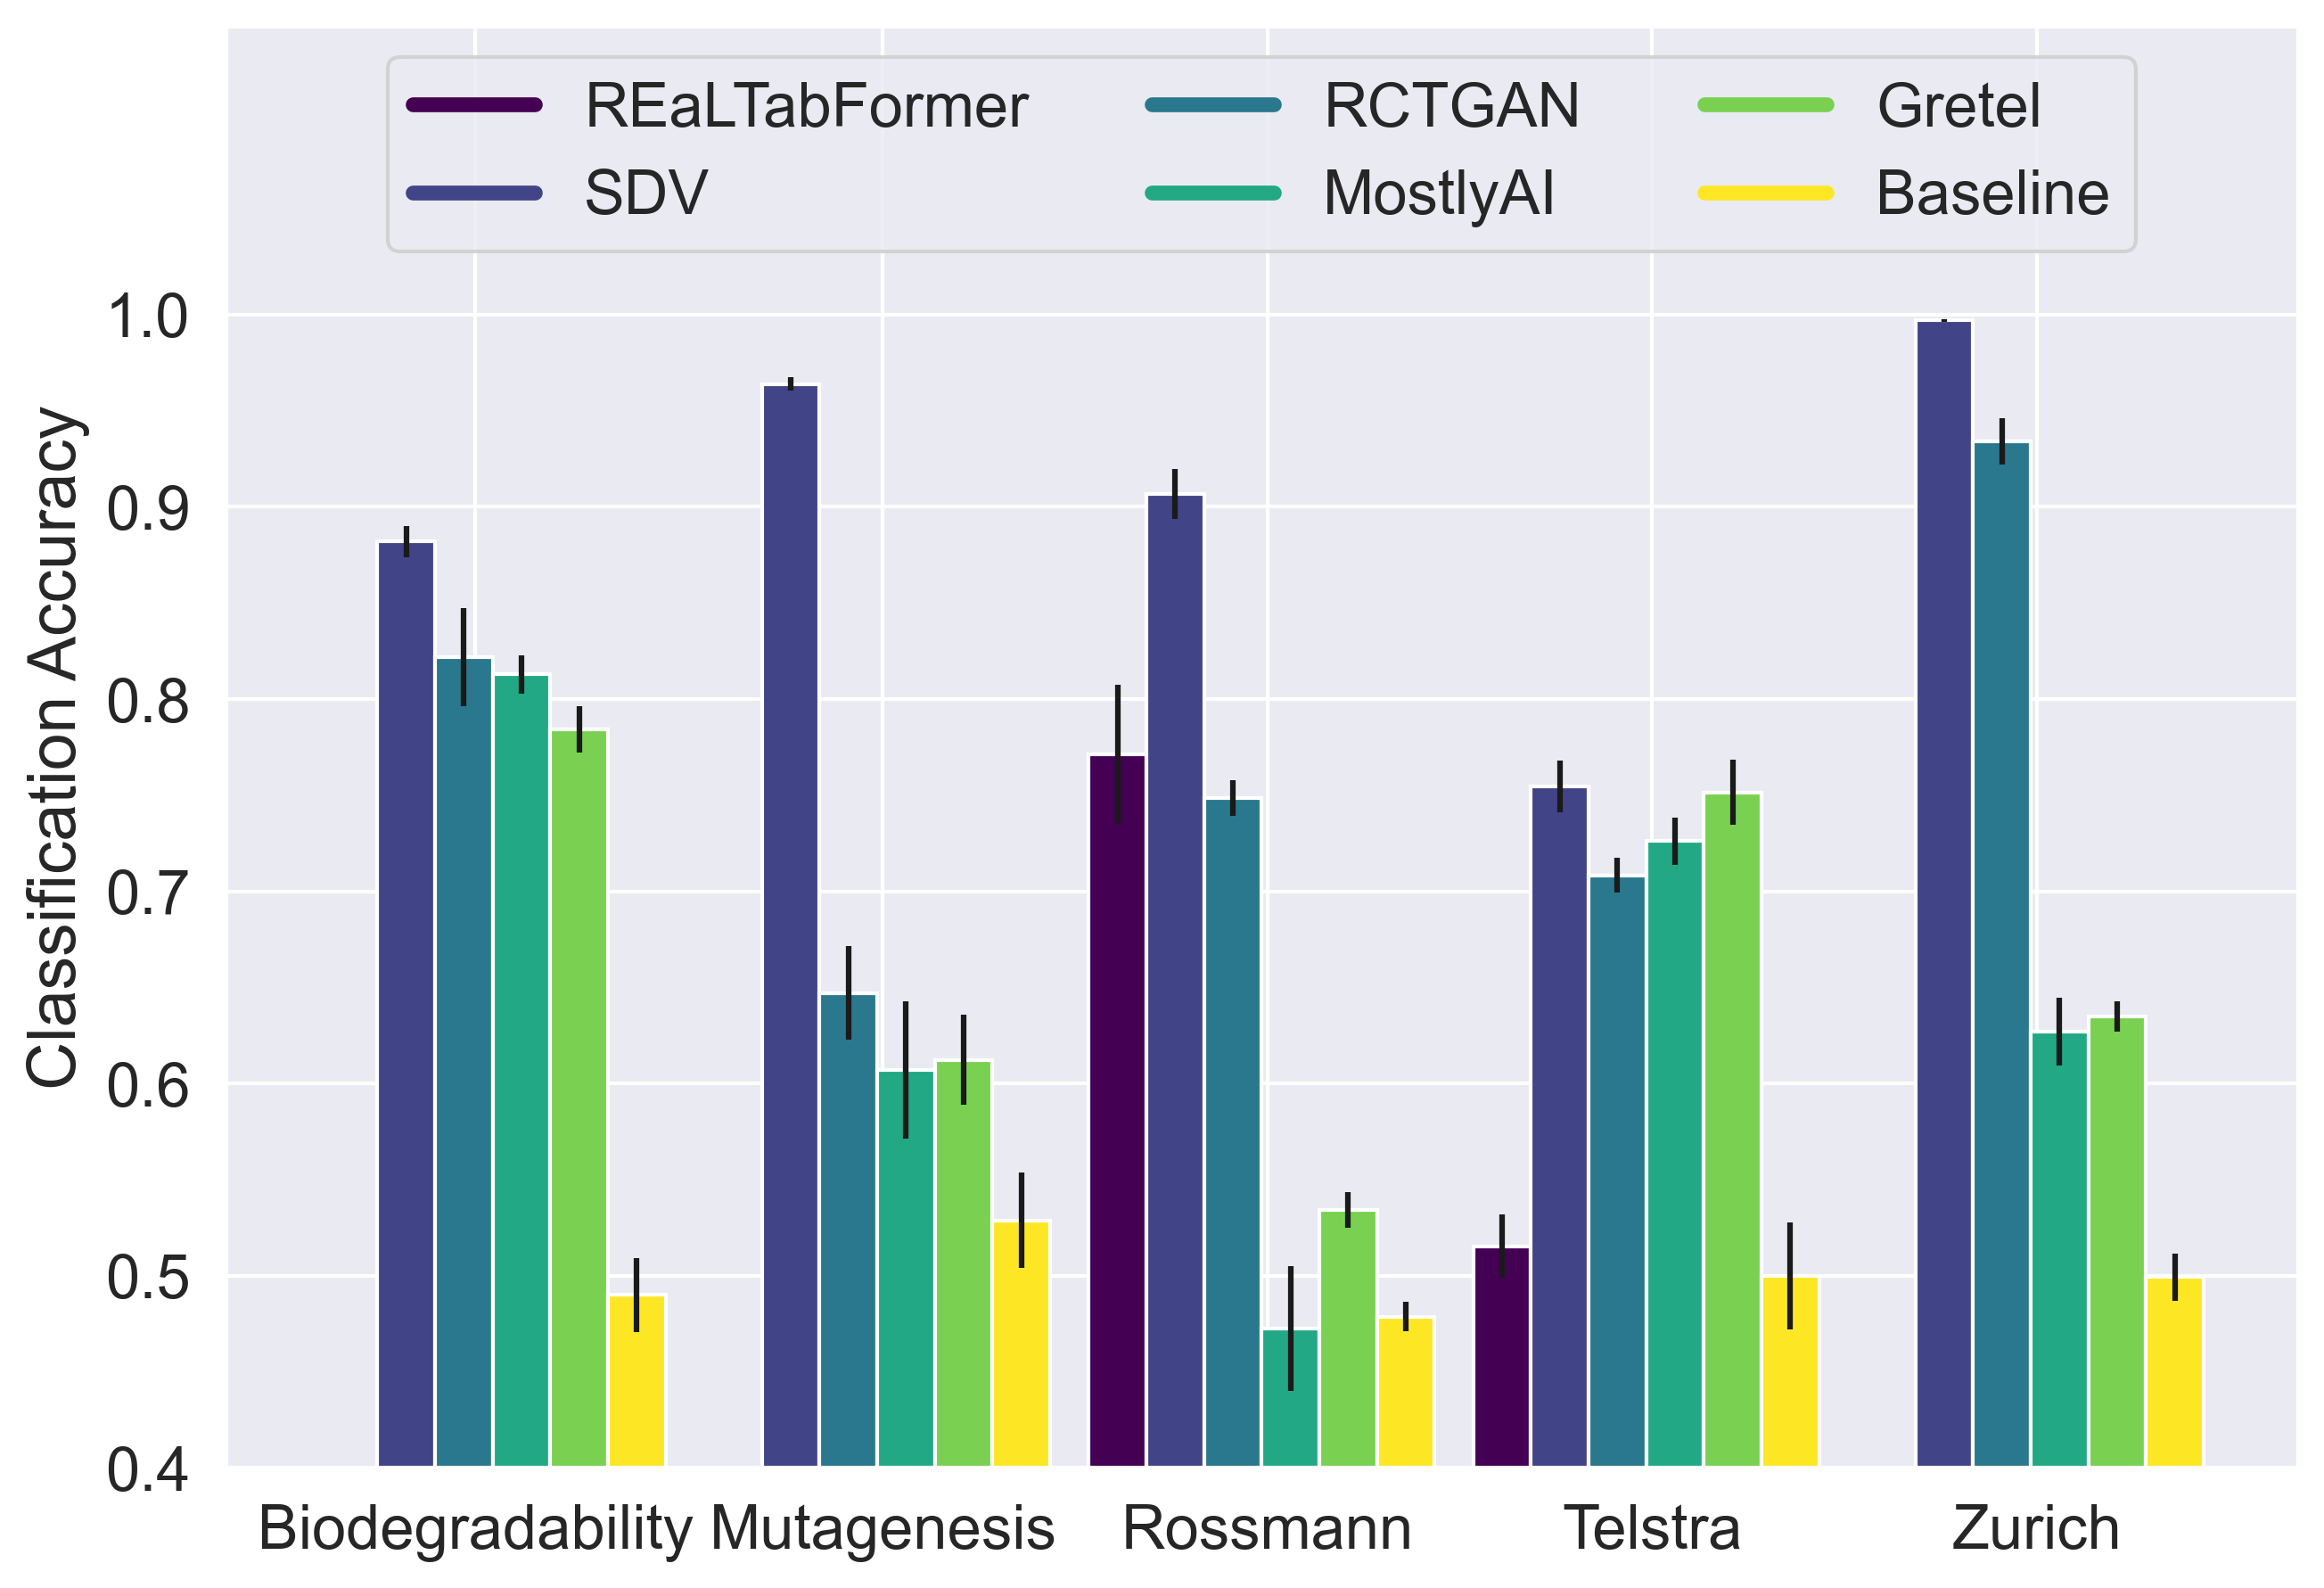

In [51]:

method_names = [
    'REaLTabFormer', 
    'SDV', 
    'RCTGAN', 
    'MostlyAI', 
    'Gretel', 
    'Baseline']
metric_names = ['XGB', 
                'XGB Child Column Means', 
                'XGB Child Count', 
                'XGB Child Count and Column Means',
                ]
N = len(methods) # number of metrics
M = len(datasets) # number of methods
ind = np.arange(M) # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
# set dpi
fig.dpi = 300
# make font size bigger
# plt.rcParams.update({'font.size': 20})

colors = plt.cm.viridis(np.linspace(0, 1, N)) # create a color map

for j, metric in enumerate(methods):
    metric_means = [means[method][j] if method in means else 0 for method in datasets]
    metric_ses = [ses[method][j] if method in ses else 0 for method in datasets]
    ax.bar(ind + width*j, metric_means, width, yerr=metric_ses, color=colors[j])

# ax.set_ylabel('Means')
# ax.set_title(f'Classification accuracy by method for denormalized dataset {dataset}')
x_ticks = ind + 2.6*width
x_ticks[0] = ind[0] + 2.2*width
ax.set_xticks(x_ticks)
ax.set_xticklabels(dataset_names)
y_min = 0.4
ax.set_ylim(y_min, 1.15)
ax.set_yticks(np.arange(y_min, 1.01, 0.1))
ax.set_ylabel("Classification Accuracy")

# Create a legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors[i], lw=4) for i in range(N)]
ax.legend(custom_lines, method_names, loc='upper center', ncol=3) # move the legend

plt.savefig("../final_report/figures/all_datasets_xgb_only.png")
plt.show()

## MULTI TABLE ZA XGB BREZ INFO ZA VSE METODE

In [44]:
# biodegradability
methods = [
           'REaLTabFormer', 
           'SDV', 
           'RCTGAN', 
            'gretel', 
           'mostlyai', 
           'subsample',
           ]
datasets = [
            'biodegradability',
            'mutagenesis', 
            'rossmann-store-sales' ,
            'telstra-competition-dataset', 
            'zurich',
            ]

metrics = [
            "parent_child_logistic_detection",
            ]
means = {}
ses = {}

for dataset in datasets:
    means[dataset] = []
    ses[dataset] = []
    for method in methods:
        if method not in all_scores[dataset]:
            print(f"{method} not in {dataset}")
            means[dataset].append(0)
            ses[dataset].append(0)
            continue
        means[dataset].append(all_scores[dataset][method]["metrics"]["multi_table"][metrics[0]]["mean"][0])
        ses[dataset].append(all_scores[dataset][method]["metrics"]["multi_table"][metrics[0]]["se"][0])

REaLTabFormer not in biodegradability
REaLTabFormer not in mutagenesis
REaLTabFormer not in zurich


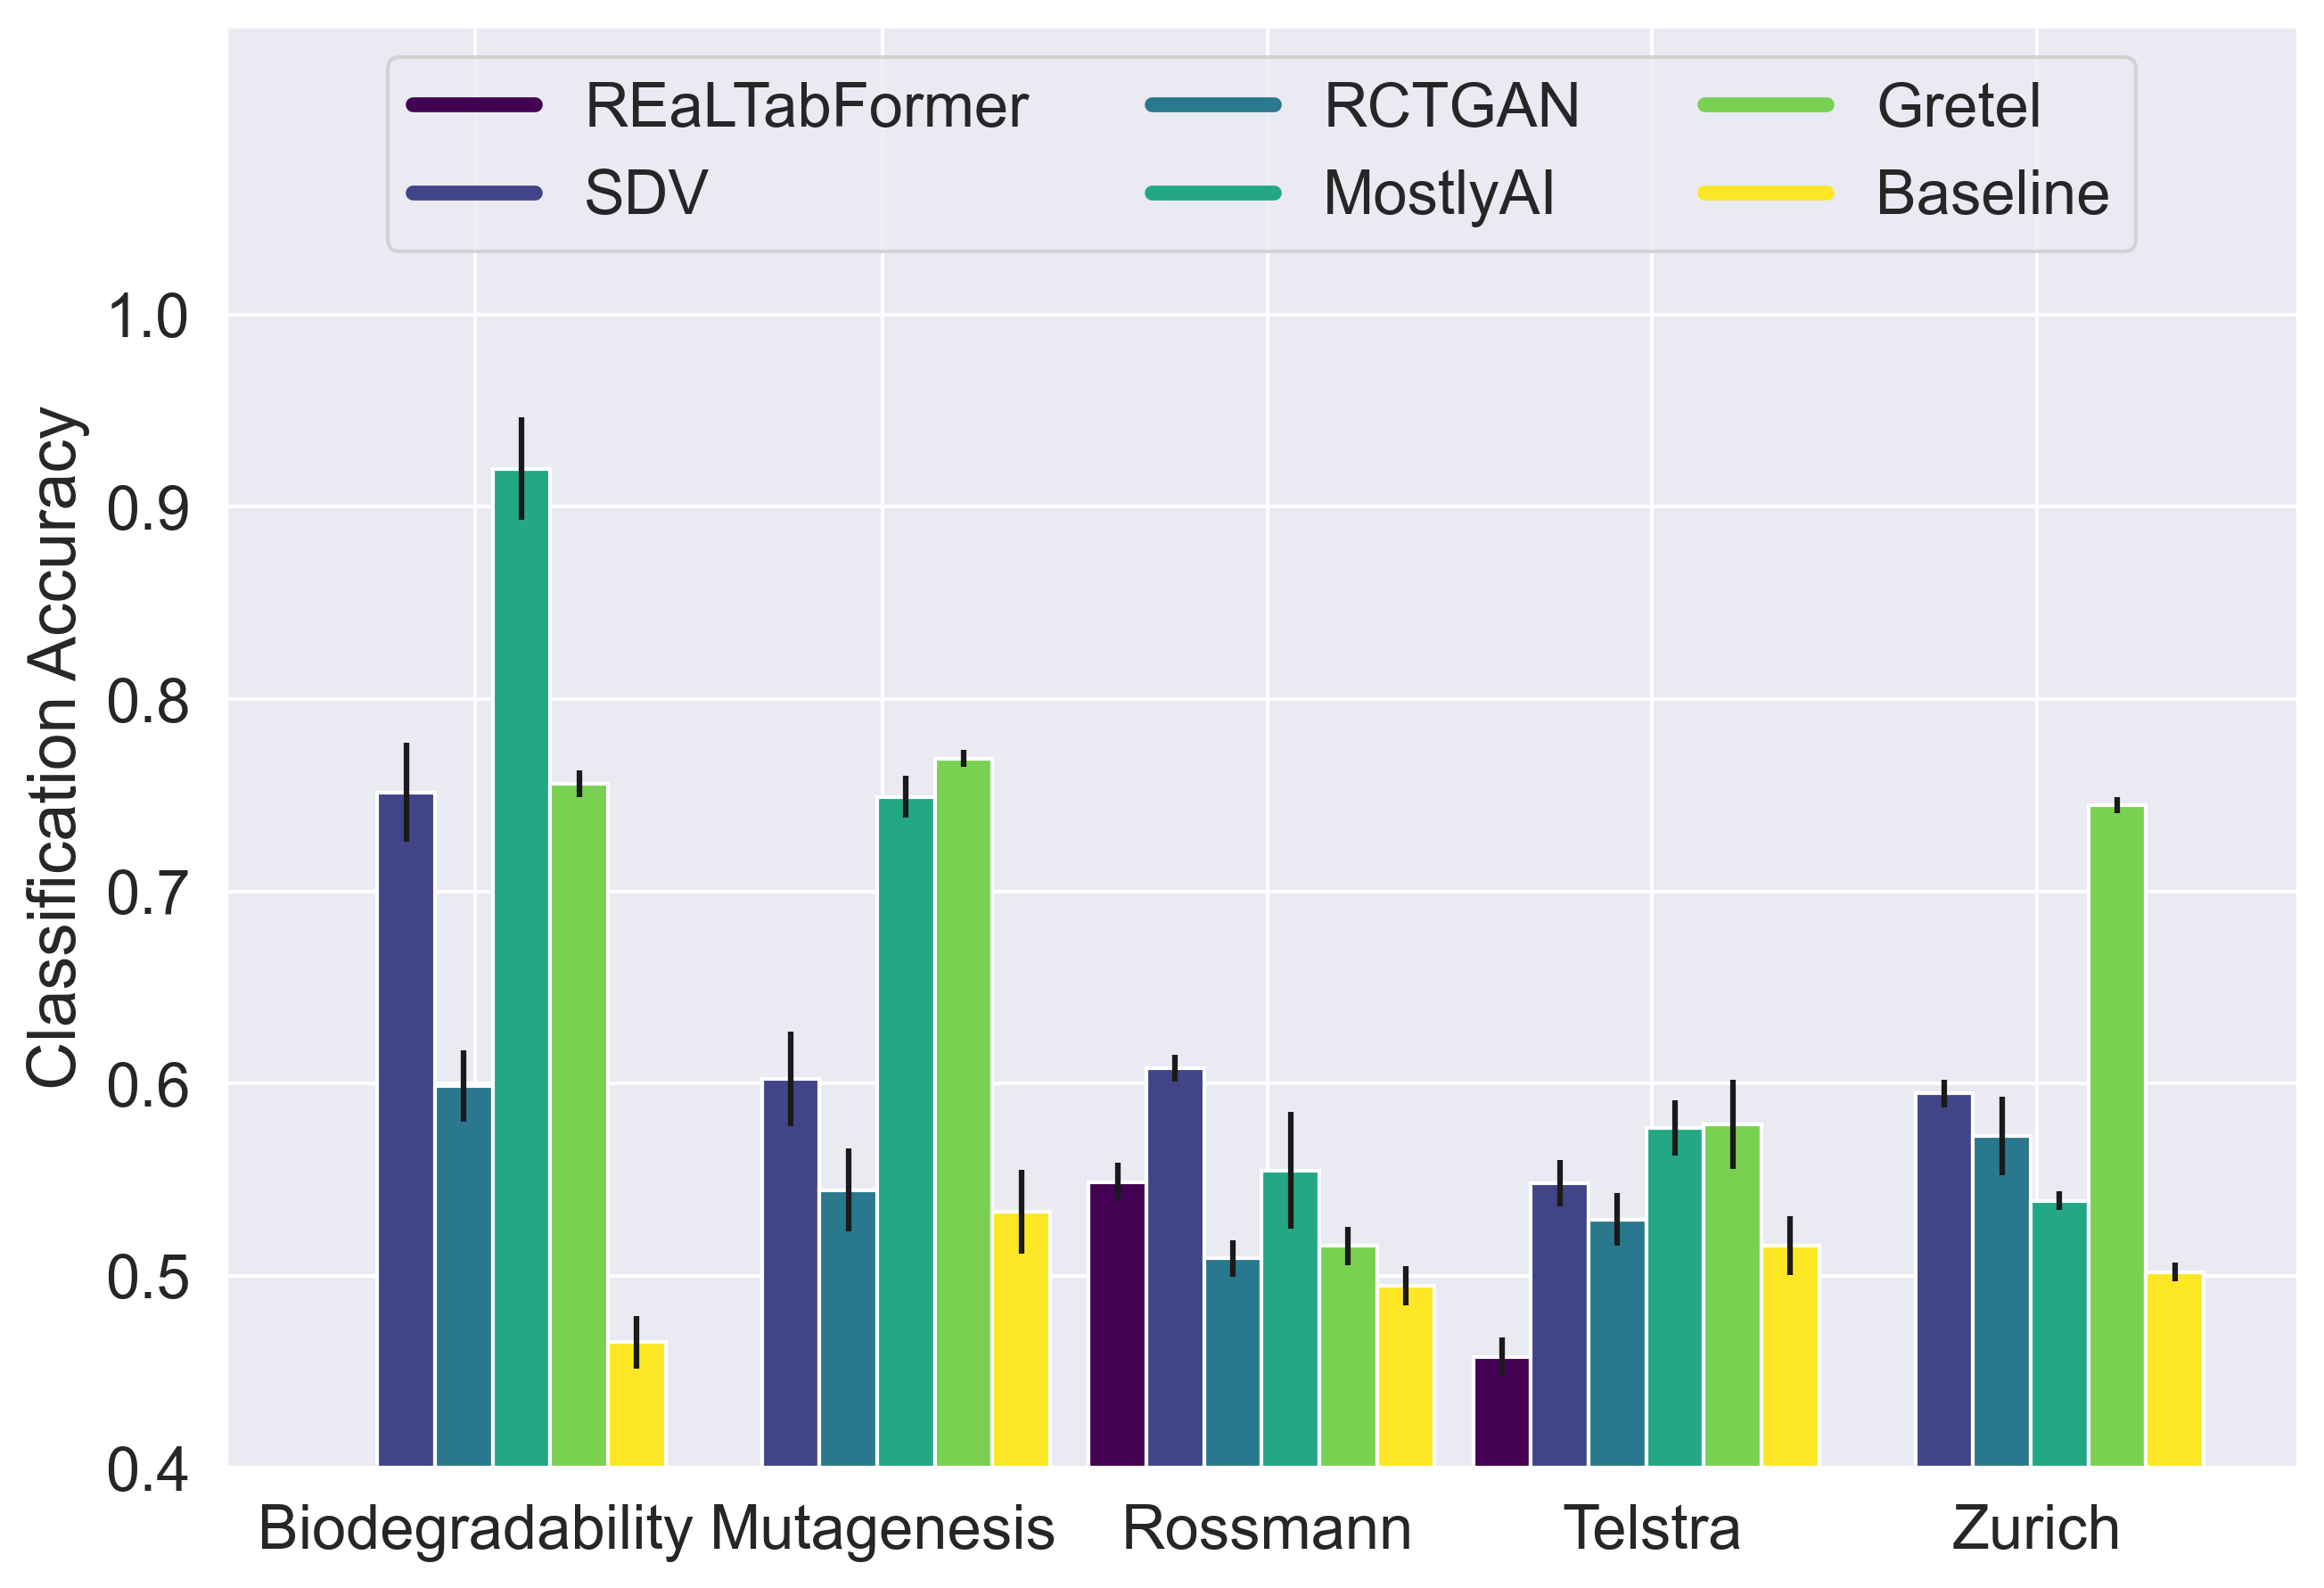

In [45]:

method_names = [
    'REaLTabFormer', 
    'SDV', 
    'RCTGAN', 
    'MostlyAI', 
    'Gretel', 
    'Baseline']
metric_names = ['XGB', 
                'XGB Child Column Means', 
                'XGB Child Count', 
                'XGB Child Count and Column Means',
                ]
N = len(methods) # number of metrics
M = len(datasets) # number of methods
ind = np.arange(M) # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
# set dpi
fig.dpi = 300
# make font size bigger
# plt.rcParams.update({'font.size': 20})

colors = plt.cm.viridis(np.linspace(0, 1, N)) # create a color map

for j, metric in enumerate(methods):
    metric_means = [means[method][j] if method in means else 0 for method in datasets]
    metric_ses = [ses[method][j] if method in ses else 0 for method in datasets]
    ax.bar(ind + width*j, metric_means, width, yerr=metric_ses, color=colors[j])

# ax.set_ylabel('Means')
# ax.set_title(f'Classification accuracy by method for denormalized dataset {dataset}')
x_ticks = ind + 2.6*width
x_ticks[0] = ind[0] + 2.2*width
ax.set_xticks(x_ticks)
ax.set_xticklabels(dataset_names)
y_min = 0.4
ax.set_ylim(y_min, 1.15)
ax.set_yticks(np.arange(y_min, 1.01, 0.1))
ax.set_ylabel("Classification Accuracy")

# Create a legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors[i], lw=4) for i in range(N)]
ax.legend(custom_lines, method_names, loc='upper center', ncol=3) # move the legend

plt.savefig("../final_report/figures/all_datasets_logistic.png")